In [ ]:
HELTHCARE

In [4]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
data = pd.read_csv(r"C:\Users\binoy\OneDrive\Desktop\entri calss\file\final project/healthcare_dataset.csv")
data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [23]:
data.shape

(55500, 15)

In [24]:
data.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [14]:
data.head().T

,0,1,2,3,4
Name,Bobby JacksOn,LesLie TErRy,DaNnY sMitH,andrEw waTtS,adrIENNE bEll
Age,30,62,76,28,43
Gender,Male,Male,Female,Female,Female
Blood Type,B-,A+,A-,O+,AB+
Medical Condition,Cancer,Obesity,Obesity,Diabetes,Cancer
Date of Admission,2024-01-31,2019-08-20,2022-09-22,2020-11-18,2022-09-19
Doctor,Matthew Smith,Samantha Davies,Tiffany Mitchell,Kevin Wells,Kathleen Hanna
Hospital,Sons and Miller,Kim Inc,Cook PLC,"Hernandez Rogers and Vang,",White-White
Insurance Provider,Blue Cross,Medicare,Aetna,Medicare,Aetna
Billing Amount,18856.281306,33643.327287,27955.096079,37909.78241,14238.317814


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [29]:
data.nunique()

Name                  49992
Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Billing Amount        50000
Room Number             400
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
dtype: int64

In [30]:
data['Age'].value_counts()

Age
38    897
37    893
57    887
34    864
80    864
     ... 
88     25
16     24
14     18
13     14
89      8
Name: count, Length: 77, dtype: int64

In [31]:
data.nunique()

Name                  49992
Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Billing Amount        50000
Room Number             400
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
dtype: int64

In [32]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,55500.0,51.539459,19.602454,13.00000,35.000000,52.000000,68.000000,89.000000
Billing Amount,55500.0,25539.316097,14211.454431,-2008.49214,13241.224652,25538.069376,37820.508436,52764.276736
Room Number,55500.0,301.134829,115.243069,101.00000,202.000000,302.000000,401.000000,500.000000


In [15]:
data['Insurance Provider'].value_counts()

Insurance Provider
Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cross          11059
Aetna               10913
Name: count, dtype: int64

In [16]:
data['Medical Condition'].value_counts()

Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64

In [64]:
# Calculate the correlation matrix
correlation_matrix = data[numerical_features].corr()
print(correlation_matrix)

                     Age  Billing Amount  Room Number
Age             1.000000       -0.003832    -0.000720
Billing Amount -0.003832        1.000000    -0.002943
Room Number    -0.000720       -0.002943     1.000000


In [33]:
data['Gender'].value_counts()

Gender
Male      27774
Female    27726
Name: count, dtype: int64

In [34]:
data['Medication'].value_counts()

Medication
Lipitor        11140
Ibuprofen      11127
Aspirin        11094
Paracetamol    11071
Penicillin     11068
Name: count, dtype: int64

In [35]:
data['Blood Type'].value_counts()

Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64

In [36]:
data['Doctor'].value_counts().sort_values()

Doctor
Rachel Potter        1
Grace Garza          1
Micheal Saunders     1
Sara Marshall        1
Diane Foster         1
                    ..
Michael Johnson     20
James Smith         20
John Smith          22
Robert Smith        22
Michael Smith       27
Name: count, Length: 40341, dtype: int64

In [37]:
data.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [38]:
data.select_dtypes(include=["number"]).skew()


Age              -0.005735
Billing Amount   -0.000978
Room Number      -0.011200
dtype: float64

In [39]:
data.select_dtypes(include=["number"]).skew().sort_values(ascending= False)


Billing Amount   -0.000978
Age              -0.005735
Room Number      -0.011200
dtype: float64

In [40]:
num_data = data.select_dtypes(include="number")
num_data

,Age,Billing Amount,Room Number
0,30,18856.281306,328
1,62,33643.327287,265
2,76,27955.096079,205
3,28,37909.782410,450
4,43,14238.317814,458
...,...,...,...
55495,42,2650.714952,417
55496,61,31457.797307,316
55497,38,27620.764717,347
55498,43,32451.092358,321


In [41]:
numeric_columns=list(num_data)
numeric_columns

['Age', 'Billing Amount', 'Room Number']

In [42]:
num_data.isnull().sum()/len(num_data)*100


Age               0.0
Billing Amount    0.0
Room Number       0.0
dtype: float64

In [43]:
num_data.skew()


Age              -0.005735
Billing Amount   -0.000978
Room Number      -0.011200
dtype: float64

In [44]:
cat_data = data.select_dtypes(include="object")
cat_data

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,Elective,2019-05-31,Ibuprofen,Abnormal


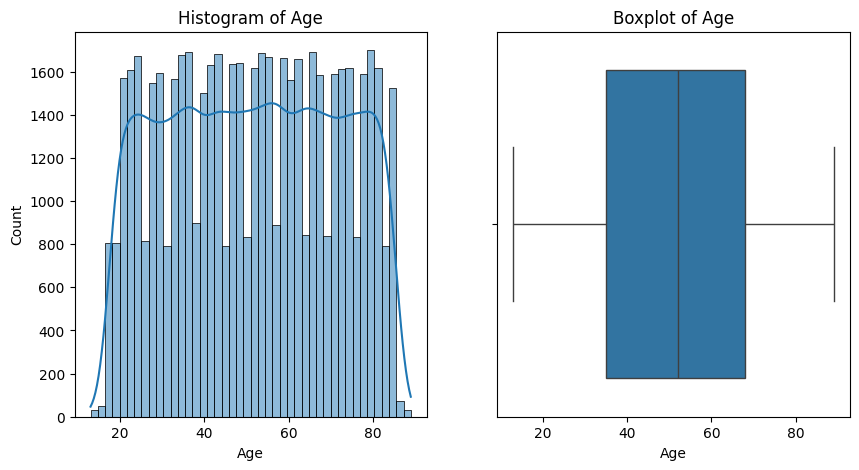

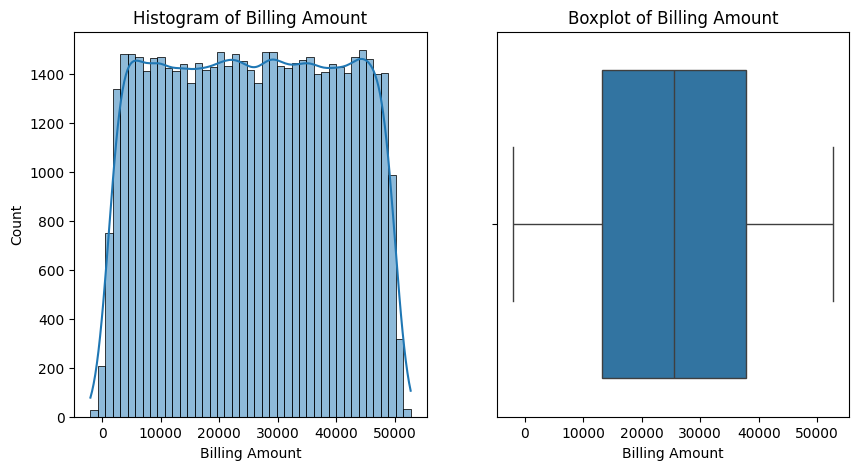

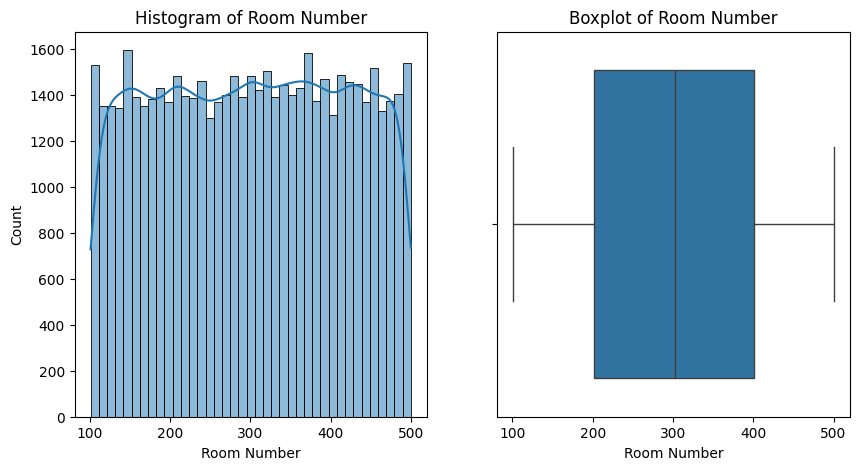

In [67]:
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    
  # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

In [68]:
data.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


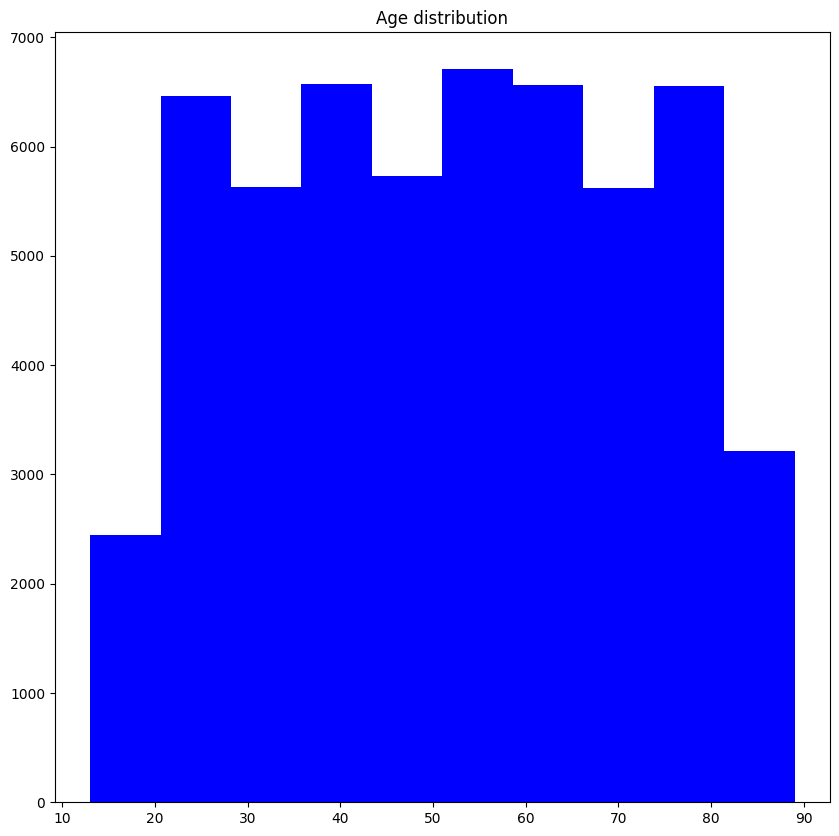

In [70]:
#Data Visualization
plt.figure(figsize=(10,10))
plt.hist(data['Age'],color='b')
plt.title("Age distribution");

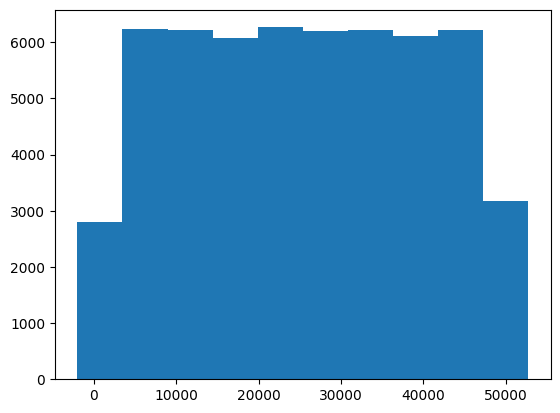

In [21]:
plt.hist(data['Billing Amount'])
plt.show()

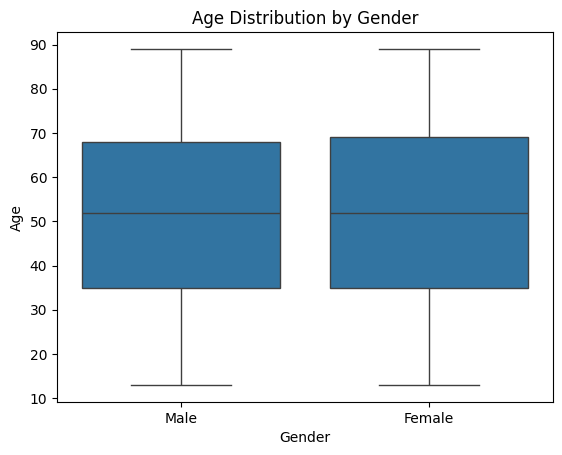

In [12]:
# Example of comparing gender with another variable (e.g., Age, Disease type)
sns.boxplot(x='Gender', y='Age', data=data)
plt.title("Age Distribution by Gender")
plt.show()

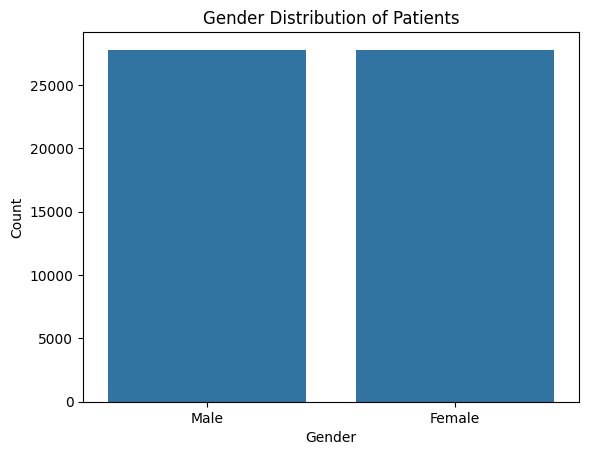

In [13]:
# Visualize the gender distribution using seaborn's countplot
sns.countplot(x='Gender', data=data)
plt.title("Gender Distribution of Patients")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

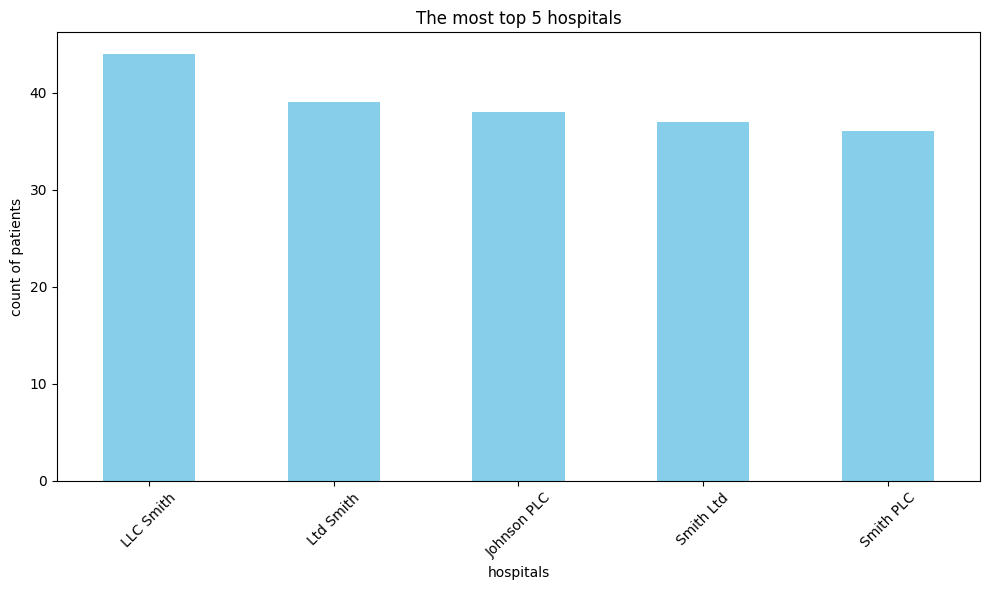

In [22]:
hospital_counts = data['Hospital'].value_counts()
top_5_hospitals = hospital_counts.head(5)
plt.figure(figsize=(10, 6))
top_5_hospitals.plot(kind='bar', color='skyblue')
plt.title('The most top 5 hospitals')
plt.xlabel('hospitals')
plt.ylabel('count of patients')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

In [14]:
# List of categorical features
categorical_features = data.select_dtypes(include=['object', 'category']).columns
print("Categorical Features:", categorical_features)

Categorical Features: Index(['Name', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Admission Type', 'Discharge Date', 'Medication', 'Test Results'],
      dtype='object')


In [16]:
# Check for missing values in categorical features
missing_values = data[categorical_features].isnull().sum()
print("Missing Values in Categorical Features:\n", missing_values)

Missing Values in Categorical Features:
 Name                  0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


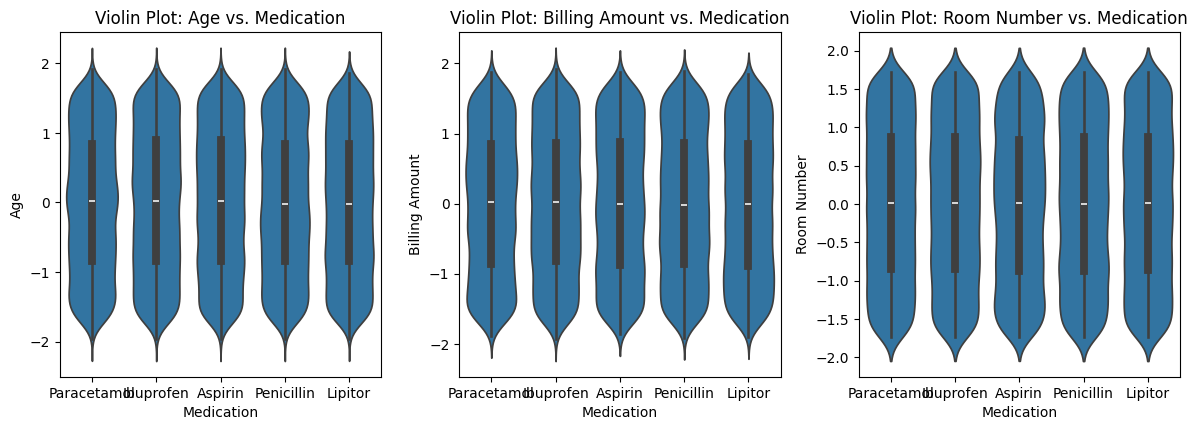

In [72]:
# Set up the plotting environment
plt.figure(figsize=(12, 8))

# Loop over the numerical features and create a violin plot for each
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)  # Adjust the grid size depending on the number of numerical features
    sns.violinplot(x='Medication', y=feature, data=data)
    plt.title(f"Violin Plot: {feature} vs. Medication")

# Display all the plots
plt.tight_layout()
plt.show()

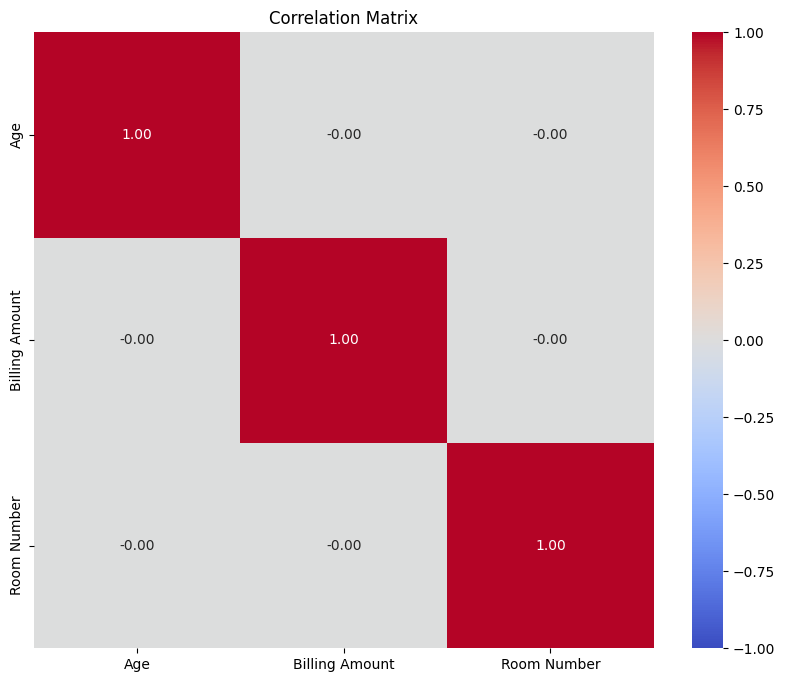

In [109]:
plt.figure(figsize=(10, 8))
corr=num_data.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation Matrix')
plt.show()

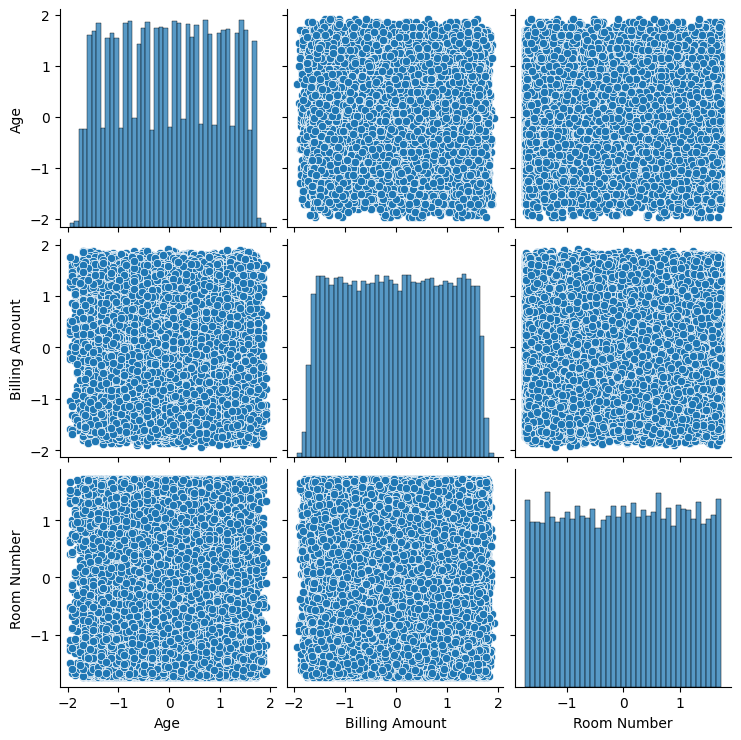

In [113]:
sns.pairplot(data)

In [20]:
columns_to_drop=['Name','Hospital','Date of Admission','Discharge Date','Room Number','Gender','Billing Amount','Doctor']
cleaned_data=data.drop(columns_to_drop,axis=1)
cleaned_data

,Age,Blood Type,Medical Condition,Insurance Provider,Admission Type,Medication,Test Results
0,30,B-,Cancer,Blue Cross,Urgent,Paracetamol,Normal
1,62,A+,Obesity,Medicare,Emergency,Ibuprofen,Inconclusive
2,76,A-,Obesity,Aetna,Emergency,Aspirin,Normal
3,28,O+,Diabetes,Medicare,Elective,Ibuprofen,Abnormal
4,43,AB+,Cancer,Aetna,Urgent,Penicillin,Abnormal
...,...,...,...,...,...,...,...
55495,42,O+,Asthma,Blue Cross,Elective,Penicillin,Abnormal
55496,61,AB-,Obesity,Cigna,Elective,Aspirin,Normal
55497,38,B+,Hypertension,UnitedHealthcare,Urgent,Ibuprofen,Abnormal
55498,43,O-,Arthritis,Medicare,Elective,Ibuprofen,Abnormal


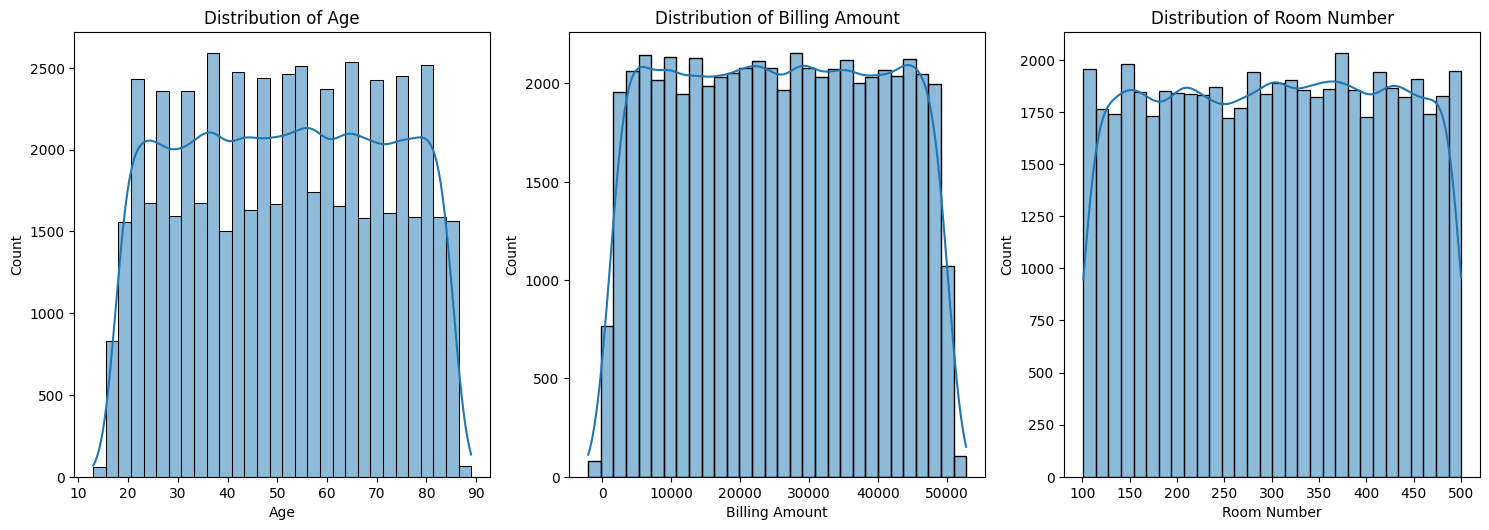

In [13]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Create histograms for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i) 
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()
